<a href="https://colab.research.google.com/github/Yoon2596/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EA%B3%BC%EC%A0%9C/%EA%B3%BC%EC%A0%9C_0722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0722. Adult Income 데이터셋을 이용한 전처리 및 분류 모델(소득이 50K 이상인지 예측)을 아래 설명을 참조하여 수행하세요.

[ 문제 설명 ]

- Adult Income 데이터셋을 로드합니다.
- 결측치를 처리합니다.
- 이상치를 제외합니다.
- 파생 변수를 작성합니다.
- 범주형 변수를 인코딩합니다.
- 변수 선택 및 독립변수 종속변수를 분리합니다.
- 데이터를 표준화합니다.
- 데이터셋을 학습용과 테스트용으로 나눕니다.
- Logistic Regression 모델 생성 및 학습합니다.
- 예측 및 평가합니다.

Adult Income 데이터셋(또는 "Census Income" 데이터셋)은 미국 인구 조사 데이터를 바탕으로 각 개인의 특성에 따른 소득 수준을 예측하는 데 사용됩니다. 이 데이터셋의 컬럼들은 다음과 같습니다:

- age: 나이 (숫자)
개인의 나이를 나타냅니다.
- workclass: 직업 유형 (범주형)
개인의 직업 유형을 나타냅니다. 예를 들어, 'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked' 등이 있습니다.
- fnlwgt: 최종 가중치 (숫자)
인구 조사에서 각 행이 전체 인구를 대표하는 비율을 나타내는 가중치입니다. 더 큰 값은 더 큰 대표성을 의미합니다.
- education: 교육 수준 (범주형)
개인의 교육 수준을 나타냅니다. 예를 들어, 'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool' 등이 있습니다.
- education-num: 교육 수준(숫자) (숫자)
교육 수준을 숫자로 나타낸 것입니다. 예를 들어, 'Bachelors'는 13, 'HS-grad'는 9 등으로 교육의 연수를 나타냅니다.
- marital-status: 결혼 상태 (범주형)
개인의 결혼 상태를 나타냅니다. 예를 들어, 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse' 등이 있습니다.
- occupation: 직업 (범주형)
개인의 직업을 나타냅니다. 예를 들어, 'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces' 등이 있습니다.
- relationship: 가족 관계 (범주형)
개인의 가족 관계를 나타냅니다. 예를 들어, 'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried' 등이 있습니다.
- race: 인종 (범주형)
개인의 인종을 나타냅니다. 예를 들어, 'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black' 등이 있습니다.
- sex: 성별 (범주형)
개인의 성별을 나타냅니다. 'Male' 또는 'Female'입니다.
- capital-gain: 자본 이득 (숫자)
개인의 자본 이득을 나타냅니다. 자본 자산의 매매에서 발생하는 이익입니다.
- capital-loss: 자본 손실 (숫자)
개인의 자본 손실을 나타냅니다. 자본 자산의 매매에서 발생하는 손실입니다.
- hours-per-week: 주당 근무 시간 (숫자)
개인이 주당 일하는 시간을 나타냅니다.
- native-country: 출생 국가 (범주형)
개인의 출생 국가를 나타냅니다. 예를 들어, 'United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands' 등이 있습니다.
- income: 소득 수준 (범주형)
개인의 소득 수준을 나타냅니다. ' <=50K' 또는 ' >50K'로, 연 소득이 50,000달러 이하인지 초과인지를 나타냅니다.

# 1. 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data1 = data.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data1['workclass'].unique()



array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [ ]:
data1['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [ ]:
data1['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
data1['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
data1['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [ ]:
data1['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [ ]:
data1['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data1['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
data1['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<Figure size 2500x1000 with 0 Axes>

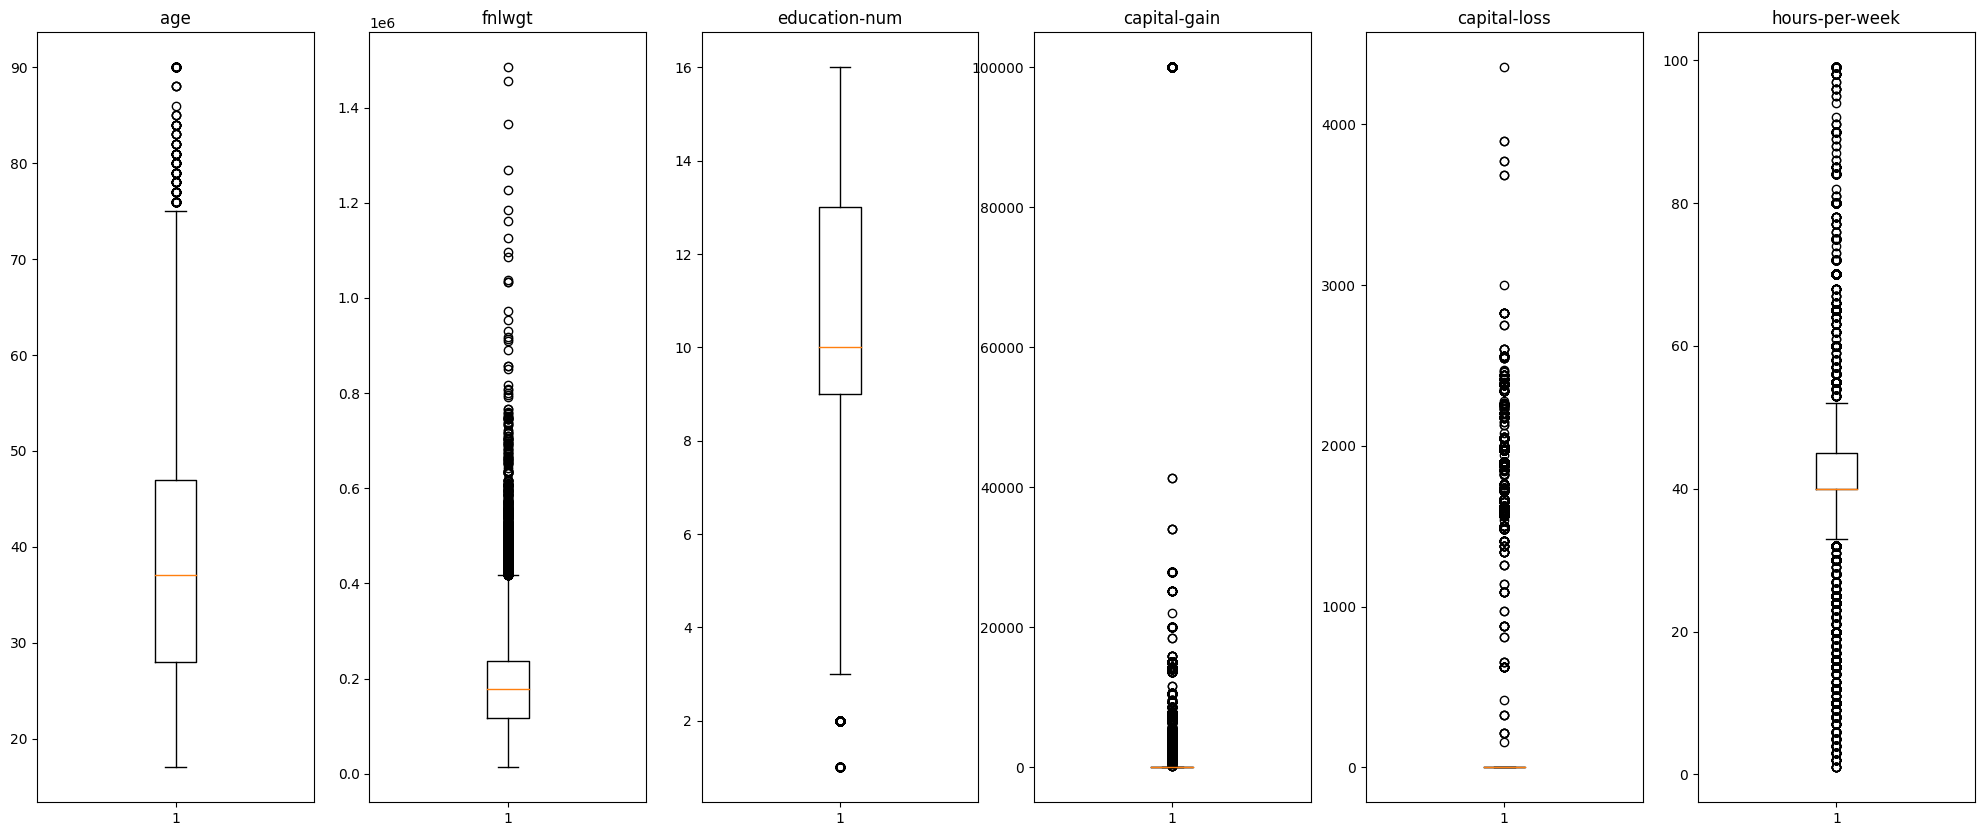

In [ ]:
# 숫자 이상치 탐색
plt.figure(figsize=(25, 10))
# data2_res = plt.boxplot(data1[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
#            'hours-per-week']])

data2_res = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
           'hours-per-week']
# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(25, 10))

# 각 서브플롯에 박스플롯 그리기
for i, var in enumerate(data2_res):
    axes[i].boxplot(data1[var])
    axes[i].set_title(var)

plt.show()

<Figure size 2500x1000 with 0 Axes>

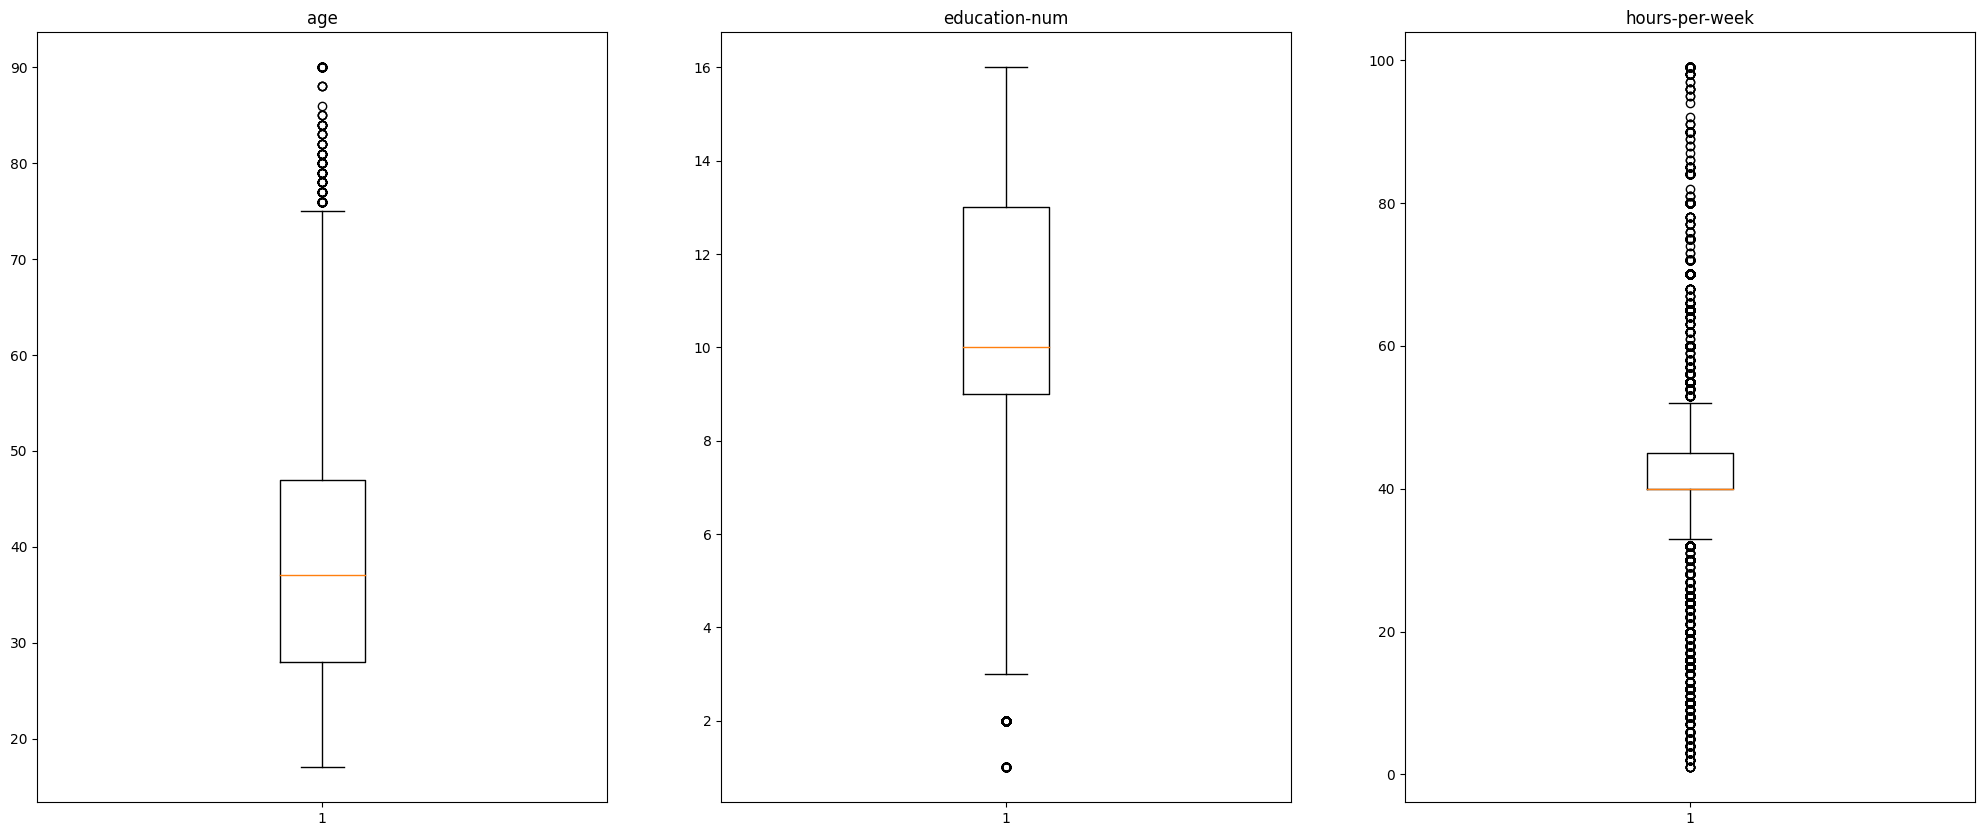

In [ ]:
# 숫자 이상치 탐색
plt.figure(figsize=(25, 10))
# data2_res = plt.boxplot(data1[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
#            'hours-per-week']])

data2_res = ['age',  'education-num', 'hours-per-week']
# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

# 각 서브플롯에 박스플롯 그리기
for i, var in enumerate(data2_res):
    axes[i].boxplot(data1[var])
    axes[i].set_title(var)

plt.show()

In [ ]:
# 2개만 설정 및 전처리
data2 = data1.copy()

# 'age' 컬럼의 이상치를 평균값으로 대체
age_mean = data2['age'].mean()
data2['age'] = data2['age'].apply(lambda x : x if x <= 75 else data2['age'].mean())

# 'education-num' 컬럼의 이상치를 평균값으로 대체
education_num_mean = data2['education-num'].mean()
data2['education-num'] = data2['age'].apply(lambda x : x if x >= 3 else data2['education-num'].mean())

# 'hour-per-week' 컬럼의 이상치를 평균값으로 대체
# hours_per_week_mean = data2['hours-per-week'].mean()
# data2['hours-per-week'] = data2['hours-per-week'].apply(lambda x : x if 39 <= x else data2['hours-per-week'].mean())
# data2['hours-per-week'] = data2['hours-per-week'].apply(lambda x : x if 42 >= x else data2['hours-per-week'].mean())

In [ ]:
data2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,39.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,50.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,38.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,53.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,28.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Figure size 2500x1000 with 0 Axes>

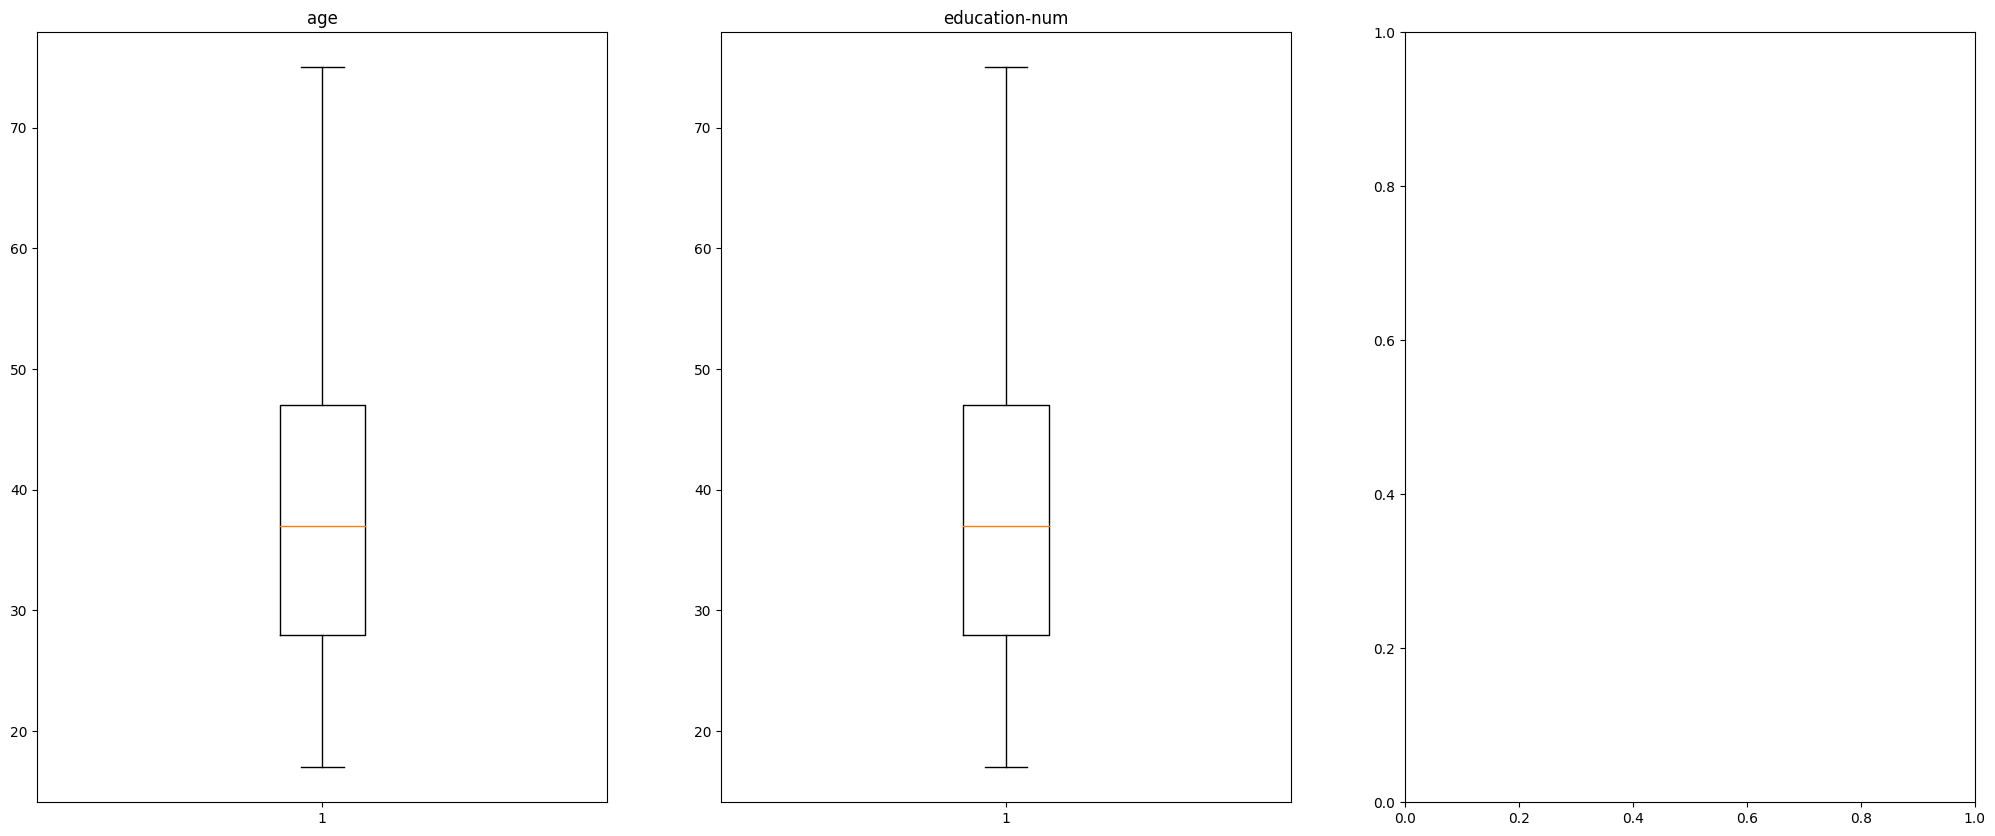

In [ ]:
# 숫자 이상치 탐색
plt.figure(figsize=(25, 10))

data2_res = ['age',  'education-num']
# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

# 각 서브플롯에 박스플롯 그리기
for i, var in enumerate(data2_res):
    axes[i].boxplot(data2[var])
    axes[i].set_title(var)

plt.show()

In [ ]:
# 범주형 변수 인코딩
data2['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

data2['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
data2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,39.0,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50.0,Self-emp-not-inc,83311,Bachelors,50.0,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38.0,Private,215646,HS-grad,38.0,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53.0,Private,234721,11th,53.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28.0,Private,338409,Bachelors,28.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [ ]:
# 안쓰는 컬럼 드랍
data2 = data2.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)
data2.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,income
0,39.0,State-gov,Bachelors,39.0,Never-married,Adm-clerical,Not-in-family,White,0,United-States,0
1,50.0,Self-emp-not-inc,Bachelors,50.0,Married-civ-spouse,Exec-managerial,Husband,White,0,United-States,0
2,38.0,Private,HS-grad,38.0,Divorced,Handlers-cleaners,Not-in-family,White,0,United-States,0
3,53.0,Private,11th,53.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,United-States,0
4,28.0,Private,Bachelors,28.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,Cuba,0


In [ ]:
data3 = data2.copy()
data3.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,income
0,39.0,State-gov,Bachelors,39.0,Never-married,Adm-clerical,Not-in-family,White,0,United-States,0
1,50.0,Self-emp-not-inc,Bachelors,50.0,Married-civ-spouse,Exec-managerial,Husband,White,0,United-States,0
2,38.0,Private,HS-grad,38.0,Divorced,Handlers-cleaners,Not-in-family,White,0,United-States,0
3,53.0,Private,11th,53.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,United-States,0
4,28.0,Private,Bachelors,28.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,Cuba,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 리스트
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# LabelEncoder 객체 생성
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data3[column] = le.fit_transform(data3[column])
    label_encoders[column] = le

# 결과 출력
print(data3)


        age  workclass  education  education-num  marital-status  occupation  \
0      39.0          5          9           39.0               4           0   
1      50.0          4          9           50.0               2           3   
2      38.0          2         11           38.0               0           5   
3      53.0          2          1           53.0               2           5   
4      28.0          2          9           28.0               2           9   
...     ...        ...        ...            ...             ...         ...   
32556  27.0          2          7           27.0               2          12   
32557  40.0          2         11           40.0               2           6   
32558  58.0          2         11           58.0               6           0   
32559  22.0          2         11           22.0               4           0   
32560  52.0          3         11           52.0               2           3   

       relationship  race  sex  native-

In [ ]:
data3.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,income
0,39.0,5,9,39.0,4,0,1,4,0,38,0
1,50.0,4,9,50.0,2,3,0,4,0,38,0
2,38.0,2,11,38.0,0,5,1,4,0,38,0
3,53.0,2,1,53.0,2,5,0,2,0,38,0
4,28.0,2,9,28.0,2,9,5,2,1,4,0
5,37.0,2,12,37.0,2,3,5,4,1,38,0
6,49.0,2,6,49.0,3,7,1,2,1,22,0
7,52.0,4,11,52.0,2,3,0,4,0,38,1
8,31.0,2,12,31.0,4,9,1,4,1,38,1
9,42.0,2,9,42.0,2,3,0,4,0,38,1


In [ ]:
data3.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,income
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.196738,2.199324,10.333764,38.196738,2.580134,5.959850,1.418341,3.678602,0.324315,36.382567,0.248922
std,12.725417,0.953925,3.812292,12.725417,1.498016,4.029566,1.601338,0.834709,0.468126,6.105372,0.432396
min,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,28.000000,2.000000,2.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,37.000000,2.000000,11.000000,37.000000,2.000000,6.000000,1.000000,4.000000,0.000000,38.000000,0.000000
75%,47.000000,2.000000,12.000000,47.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,75.000000,6.000000,15.000000,75.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,1.000000


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  int64  
 2   education       30162 non-null  int64  
 3   education-num   30162 non-null  float64
 4   marital-status  30162 non-null  int64  
 5   occupation      30162 non-null  int64  
 6   relationship    30162 non-null  int64  
 7   race            30162 non-null  int64  
 8   sex             30162 non-null  int64  
 9   native-country  30162 non-null  int64  
 10  income          30162 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.8 MB


In [ ]:
print(data3.dtypes)

age               float64
workclass           int64
education           int64
education-num     float64
marital-status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
native-country      int64
income              int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 특성과 레이블 분리
X = data3.drop('income', axis=1)
y = data3['income']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy,4)}')

Accuracy: 0.7392


In [ ]:
data3.feature_names

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'income'],
      dtype='object')

<Figure size 2500x1000 with 0 Axes>

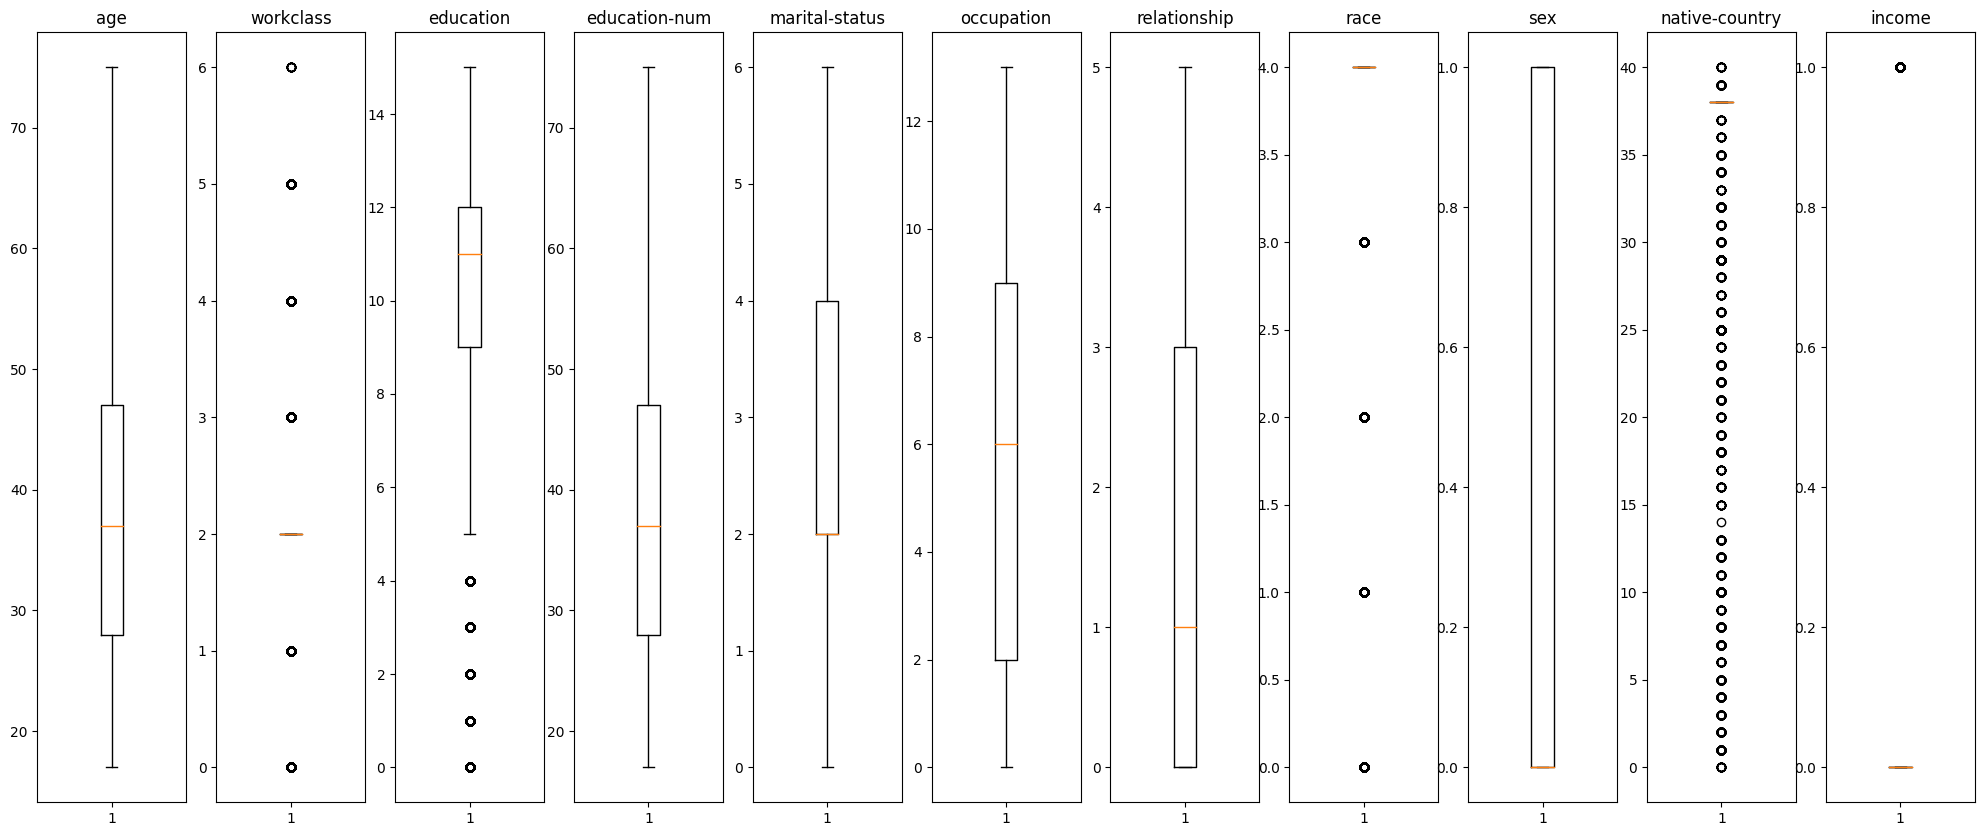

In [ ]:
# 숫자 이상치 탐색
plt.figure(figsize=(25, 10))
# data2_res = plt.boxplot(data1[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
#            'hours-per-week']])

data2_res = ['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'income']
# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=11, figsize=(25, 10))

# 각 서브플롯에 박스플롯 그리기
for i, var in enumerate(data2_res):
    axes[i].boxplot(data3[var])
    axes[i].set_title(var)

plt.show()

In [ ]:
# 안쓰는 컬럼 드랍
data2 = data2.drop(['workclass', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)
data2.head()

# 강사님 버전
전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data_org = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

QR 방법을 사용한 이상치 제거 가이드

IQR 계산
- IQR(Interquartile Range)은 데이터의 중앙 50%를 나타내며, 데이터의 변동성을 측정하는 데 사용됩니다. IQR은 3사분위수(Q3)와 1사분위수(Q1)의 차이로 계산됩니다.
  - Q1: 데이터의 25번째 백분위수(1사분위수)
  - Q3: 데이터의 75번째 백분위수(3사분위수)
  - IQR: Q3 - Q1

이상치 경계 계산
- 일반적으로 IQR의 1.5배를 사용하여 이상치 경계를 설정합니다.
  - Lower Bound: Q1 - 1.5 * IQR
  - Upper Bound: Q3 + 1.5 * IQR
- 이 경계를 벗어나는 데이터 포인트는 이상치로 간주됩니다.

이상치를 제거는 데이터의 분포를 왜곡하는 극단적인 값을 제거하여 데이터 분석 및 모델 성능을 향상시키는 데 도움이 됩니다. 도메인 지식과 데이터의 특성을 고려해서 이상치 제거를 진행합니다.

In [ ]:
data_org.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
data = data_org.copy()

# 2. 계측치 처리
data.dropna(inplace=True)

# 3. 이상치 제거 (여기서는 'capital-gain' 과 'capital-loss'에서 극단적인 값들을 이상치로 가정)
Q1 = data['capital-gain'].quantile(0.25)
Q3 = data['capital-gain'].quantile(0.75)
IQR = Q3 - Q1

capital_gain_outliers = data[(data['capital-gain'] < Q1 - 1.5 * IQR) | (data['capital-gain'] > Q3 + 1.5 * IQR)]
print(capital_gain_outliers)

Q1 = data['capital-loss'].quantile(0.25)
Q3 = data['capital-loss'].quantile(0.75)
IQR = Q3 - Q1

capital_loss_outliers = data[(data['capital-loss'] < Q1 - 1.5 * IQR) | (data['capital-loss'] > Q3 + 1.5 * IQR)]
print(capital_loss_outliers)

data = data.drop(capital_gain_outliers.index)
data = data.drop(capital_loss_outliers.index)

       age         workclass  fnlwgt    education  education-num  \
0       39         State-gov   77516    Bachelors             13   
8       31           Private   45781      Masters             14   
9       42           Private  159449    Bachelors             13   
59      30           Private  188146      HS-grad              9   
60      30           Private   59496    Bachelors             13   
...    ...               ...     ...          ...            ...   
32515   66       Federal-gov   47358         10th              6   
32518   57         Local-gov  110417      HS-grad              9   
32538   38           Private  139180    Bachelors             13   
32548   65  Self-emp-not-inc   99359  Prof-school             15   
32560   52      Self-emp-inc  287927      HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
8           Never-married  

In [ ]:
# 4. 파생변수 작성
data['capital_diff'] = data['capital-gain'] - data['capital-loss']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26197 entries, 1 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26197 non-null  int64 
 1   workclass       26197 non-null  object
 2   fnlwgt          26197 non-null  int64 
 3   education       26197 non-null  object
 4   education-num   26197 non-null  int64 
 5   marital-status  26197 non-null  object
 6   occupation      26197 non-null  object
 7   relationship    26197 non-null  object
 8   race            26197 non-null  object
 9   sex             26197 non-null  object
 10  capital-gain    26197 non-null  int64 
 11  capital-loss    26197 non-null  int64 
 12  hours-per-week  26197 non-null  int64 
 13  native-country  26197 non-null  object
 14  income          26197 non-null  object
 15  capital_diff    26197 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


One-Hot Encoding
- 비순서형 범주형 변수: 대부분의 범주형 변수는 순서가 없습니다. 예를 들어, workclass, occupation, race, sex 등의 변수는 순서가 없습니다. 이 경우, 각 범주를 고유한 이진 벡터로 변환하는 것이 적합합니다.
- 모델의 가정: Logistic Regression과 같은 선형 모델은 입력 변수들이 서로 독립적이라고 가정합니다. One-hot encoding은 이러한 가정을 유지하는 데 도움이 됩니다.
- 다중공선성 방지: One-hot encoding은 다중공선성 문제를 피하기 위해 첫 번째 범주를 제거할 수 있습니다. 이 방법은 drop_first=True 옵션을 사용하여 구현됩니다.

Label Encoding
- 순서형 범주형 변수: Label encoding은 범주에 순서가 있는 경우에 적합합니다. 예를 들어, 교육 수준(예: 초등학교 < 중학교 < 고등학교 < 대학교)은 순서가 있는 범주형 변수입니다.
- 트리 기반 모델: 결정 트리, 랜덤 포레스트, XGBoost와 같은 트리 기반 모델은 label encoding된 변수를 더 잘 처리할 수 있습니다. 이는 트리 기반 모델이 변수 간의 순서를 처리할 수 있기 때문입니다.

Adult Income 데이터셋의 경우, 대부분의 범주형 변수는 순서가 없으므로 one-hot encoding을 사용하는 것이 적절

In [ ]:
# 5. 범주형 변수 인코딩
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26197 entries, 1 to 32559
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        26197 non-null  int64
 1   fnlwgt                                     26197 non-null  int64
 2   education-num                              26197 non-null  int64
 3   capital-gain                               26197 non-null  int64
 4   capital-loss                               26197 non-null  int64
 5   hours-per-week                             26197 non-null  int64
 6   capital_diff                               26197 non-null  int64
 7   workclass_Local-gov                        26197 non-null  bool 
 8   workclass_Private                          26197 non-null  bool 
 9   workclass_Self-emp-inc                     26197 non-null  bool 
 10  workclass_Self-emp-not-inc                 26197 no

In [ ]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,capital_diff,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,37,284582,14,0,0,40,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 6. 변수 선택 및 데이터 분리
X = data.drop('income_>50K', axis=1)
y = data['income_>50K']

# 7. 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)


# 8. 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.3, random_state=42)

# 9. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 10. 예측 및 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy,2)}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.85
Confusion Matrix:
[[5951  386]
 [ 768  755]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91      6337
        True       0.66      0.50      0.57      1523

    accuracy                           0.85      7860
   macro avg       0.77      0.72      0.74      7860
weighted avg       0.84      0.85      0.84      7860

